In [25]:
from imutils.object_detection import non_max_suppression
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import imutils
import numpy as np
import requests
import pytesseract
import cv2

In [26]:
# This Python file uses the following encoding: utf-8
from PIL import Image
from pytesseract import image_to_string
import sys
filename = sys.argv[1]
img = Image.open('./i2t.png')
text = image_to_string(img, lang='kor')
#print(text)
print(text.encode('utf-8').decode('utf-8'))

PermissionError: [WinError 5] 액세스가 거부되었습니다

In [ ]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

def decode_predictions(scores, geometry):
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
 
    for y in range(0, numRows):
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]
 
        for x in range(0, numCols):
            if scoresData[x] < min_confidence:
                continue
 
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
 
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
 
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
 
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
 
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])
 
    return (rects, confidences)

In [ ]:
layerNames = ["feature_fusion/Conv_7/Sigmoid",
              "feature_fusion/concat_3"]
 
# 사전에 훈련된 EAST text detector 모델 Load
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet("model/frozen_east_text_detection.pb")

In [ ]:
width = 640
height = 640
min_confidence = 0.5
padding = 0.0

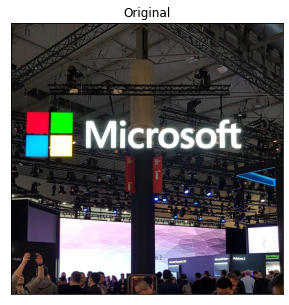

In [27]:
url = 'https://user-images.githubusercontent.com/69428232/149087561-4803b3e0-bcb4-4f9f-a597-c362db24ff9c.jpg'
 
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
 
plt_imshow("Original", org_image)

In [28]:
orig = org_image.copy()
(origH, origW) = org_image.shape[:2]
 
(newW, newH) = (width, height)
rW = origW / float(newW)
rH = origH / float(newH)
 
org_image = cv2.resize(org_image, (newW, newH))
(H, W) = org_image.shape[:2]

In [29]:
blob = cv2.dnn.blobFromImage(org_image, 1.0, (W, H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
 
(rects, confidences) = decode_predictions(scores, geometry)
boxes = non_max_suppression(np.array(rects), probs=confidences)

In [30]:
results = []
 
for (startX, startY, endX, endY) in boxes:
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
 
    dX = int((endX - startX) * padding)
    dY = int((endY - startY) * padding)
 
    startX = max(0, startX - dX)
    startY = max(0, startY - dY)
    endX = min(origW, endX + (dX * 2))
    endY = min(origH, endY + (dY * 2))
    # 영역 추출
    roi = orig[startY:endY, startX:endX]
    pytesseract.pytesseract.tesseract_cmd = r'C:\Users\user\AppData\Local\tesseract.exe'
    config = ("-l eng --psm 4")
    text = pytesseract.image_to_string(roi, config=config)
 
    results.append(((startX, startY, endX, endY), text))

PermissionError: [WinError 5] 액세스가 거부되었습니다

In [31]:
# This Python file uses the following encoding: utf-8
from PIL import Image
from pytesseract import image_to_string

img = Image.open('./i2t.png')
text = image_to_string(img)
print(text)

PermissionError: [WinError 5] 액세스가 거부되었습니다

In [32]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [19]:
path = './i2t.jpg'
image = cv2.imread(path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
text = pytesseract.image_to_string(rgb_image, lang='kor+eng')
print(text)

PermissionError: [WinError 5] 액세스가 거부되었습니다